### OLS Task02

#### 한국 아파트 가격 예측
https://drive.google.com/file/d/1v3eNjo3TjTgUPlq6Uw_v_oEQ8sVjaItw/view?usp=share_link

In [1]:
import pandas as pd

path ='../datasets/korean_apart.csv'

a_df = pd.read_csv(path, low_memory=False)
a_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [2]:
a_df.head()

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700


In [3]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002839 entries, 0 to 5002838
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   동       object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    float64
 8   거래금액    object 
dtypes: float64(3), object(6)
memory usage: 343.5+ MB


In [4]:
pre_a_df = a_df.copy()

In [5]:
# 날짜 데이터 변경
from dateutil.parser import parse

# '거래일' 컬럼에 parse 함수를 적용하여 날짜 파싱
pre_a_df['거래일'] = pre_a_df['거래일'].apply(parse)
pre_a_df


,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,2020-05-30,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,2020-01-03,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,2020-01-03,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,2020-01-03,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,2020-01-04,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [6]:
# 데이터 중복값 확인
pre_a_df.duplicated().sum()

898748

In [7]:
# 데이터 중복값 제거 
pre_a_df = pre_a_df.drop_duplicates().reset_index(drop=True)
pre_a_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,2020-05-30,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,2020-01-03,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,2020-01-03,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,2020-01-03,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,2020-01-04,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
4104086,50130.0,대정읍 하모리,2023-06-29,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
4104087,50130.0,동홍동,2023-07-04,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
4104088,50130.0,서홍동,2023-07-04,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
4104089,50130.0,중문동,2023-07-01,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [8]:
pre_a_df.duplicated().sum()

0

In [9]:
# 데이터 결측치 확인
pre_a_df.isna().sum()

지역코드      0
동         0
거래일       0
아파트       0
지번      334
전용면적      0
층         0
건축년도     47
거래금액      0
dtype: int64

In [10]:
# 결측치가 하나라도 있는 행만 선택
filtered_df = pre_a_df[pre_a_df.isna().any(axis=1)]
display(filtered_df)

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
187885,41590.0,남양읍 남양리,2020-02-05,동광뷰엘,NaN,80.0082,27,2018.0,30700
187888,41590.0,남양읍 남양리,2020-02-08,동광뷰엘,NaN,80.0082,4,2018.0,29400
187890,41590.0,남양읍 남양리,2020-02-09,동광뷰엘,NaN,80.0082,20,2018.0,31500
187897,41590.0,남양읍 남양리,2020-02-14,동광뷰엘,NaN,82.3822,16,2018.0,29500
187919,41590.0,남양읍 남양리,2020-02-23,동광뷰엘,NaN,80.0082,33,2018.0,32000
...,...,...,...,...,...,...,...,...,...
4043881,45130.0,조촌동,2023-01-23,더샵디오션시티,3976,59.9873,1,NaN,"22,000"
4044022,45130.0,조촌동,2023-02-07,더샵디오션시티,3976,84.9959,19,NaN,"40,000"
4044037,45130.0,조촌동,2023-02-18,더샵디오션시티,3976,59.9939,21,NaN,"27,500"
4044274,45130.0,조촌동,2023-03-19,더샵디오션시티,3976,103.9793,19,NaN,"51,600"


In [11]:
# 동일 아파트라도 층수에 따라서 금액이 다를 수 있기 떄문에 해당 결측치 있는 행 제거
pre_a_df = pre_a_df.dropna().reset_index(drop=True)
pre_a_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,2020-05-30,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,2020-01-03,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,2020-01-03,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,2020-01-03,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,2020-01-04,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
4103705,50130.0,대정읍 하모리,2023-06-29,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
4103706,50130.0,동홍동,2023-07-04,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
4103707,50130.0,서홍동,2023-07-04,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
4103708,50130.0,중문동,2023-07-01,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [12]:
# 데이터 결측치 확인
pre_a_df.isna().sum()

지역코드    0
동       0
거래일     0
아파트     0
지번      0
전용면적    0
층       0
건축년도    0
거래금액    0
dtype: int64

In [13]:
# 층수에 대해서 type 통일
pre_a_df['층'].unique()

array(['8', '2', '11', '7', '5', '10', '9', '13', '22', '12', '4', '20',
       '15', '3', '6', '1', '14', '-1', '39', '19', '17', '23', '21',
       '18', '35', '34', '24', '29', '27', '16', '25', '31', '32', '28',
       '30', '50', '26', '33', '37', '36', '51', '48', '43', '38', '46',
       '45', '49', '42', '40', '44', '41', '61', '52', '60', '55', '54',
       '64', '56', '47', '58', '53', '57', '59', '62', '66', '63', '-2',
       '-3', '65', '68', '67', '69', '75', '74', '71', '73', '70', '72',
       '77', '76', '79', '80', '83', '81', ' ', '-4', '78', '82', '1.0',
       '9.0', '6.0', '7.0', '10.0', '14.0', '15.0', '4.0', '5.0', '2.0',
       '12.0', '13.0', '16.0', '3.0', '8.0', '11.0', '17.0', '19.0',
       '18.0', '22.0', '20.0', '24.0', '21.0', '23.0', '25.0', '27.0',
       '26.0', '30.0', '29.0', '28.0', '39.0', '35.0', '38.0', '40.0',
       '32.0', '37.0', '33.0', '31.0', '34.0', '36.0', '41.0', '42.0',
       '45.0', '44.0', '43.0', '48.0', '47.0', '46.0', '-1.0', '

In [14]:
pre_a_df[pre_a_df['아파트']=='양지마을(5단지)(한양515-529)']

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
39822,41135.0,수내동,2020-01-03,양지마을(5단지)(한양515-529),24,59.40,13,1992.0,62500
40398,41135.0,수내동,2020-02-07,양지마을(5단지)(한양515-529),24,134.55,16,1992.0,142000
40405,41135.0,수내동,2020-02-15,양지마을(5단지)(한양515-529),24,84.90,9,1992.0,115000
41365,41135.0,수내동,2020-05-07,양지마을(5단지)(한양515-529),24,134.55,5,1992.0,136000
41368,41135.0,수내동,2020-05-09,양지마을(5단지)(한양515-529),24,84.90,7,1992.0,119000
...,...,...,...,...,...,...,...,...,...
3810886,41135.0,수내동,2023-03-06,양지마을(5단지)(한양515-529),24,164.40,12,1992.0,"195,000"
3810904,41135.0,수내동,2023-03-30,양지마을(5단지)(한양515-529),24,84.90,9,1992.0,"131,500"
3811142,41135.0,수내동,2023-04-08,양지마을(5단지)(한양515-529),24,101.93,7,1992.0,"143,000"
3811146,41135.0,수내동,2023-04-11,양지마을(5단지)(한양515-529),24,84.90,14,1992.0,"138,500"


In [15]:
# 층에 space로 띄워진 부분이 있어 값 확인
pre_a_df['층'] = pre_a_df['층'].replace(' ', 9)

In [16]:
# 층 float 타입으로 변경
import numpy as np 
pre_a_df['층'].astype(np.float16)

0           8.0
1           2.0
2          11.0
3           8.0
4           7.0
           ... 
4103705     6.0
4103706     2.0
4103707     1.0
4103708     2.0
4103709     5.0
Name: 층, Length: 4103710, dtype: float16

In [17]:
# '거래금액' 열을 안전하게 수치형으로 변환
pre_a_df['거래금액'] = pd.to_numeric(pre_a_df['거래금액'].str.replace(',', ''), errors='coerce')

In [18]:
# 층 float 타입으로 변경
pre_a_df['거래금액'].unique()

array([26700, 35500, 36500, ..., 13306, 43572, 39175], dtype=int64)

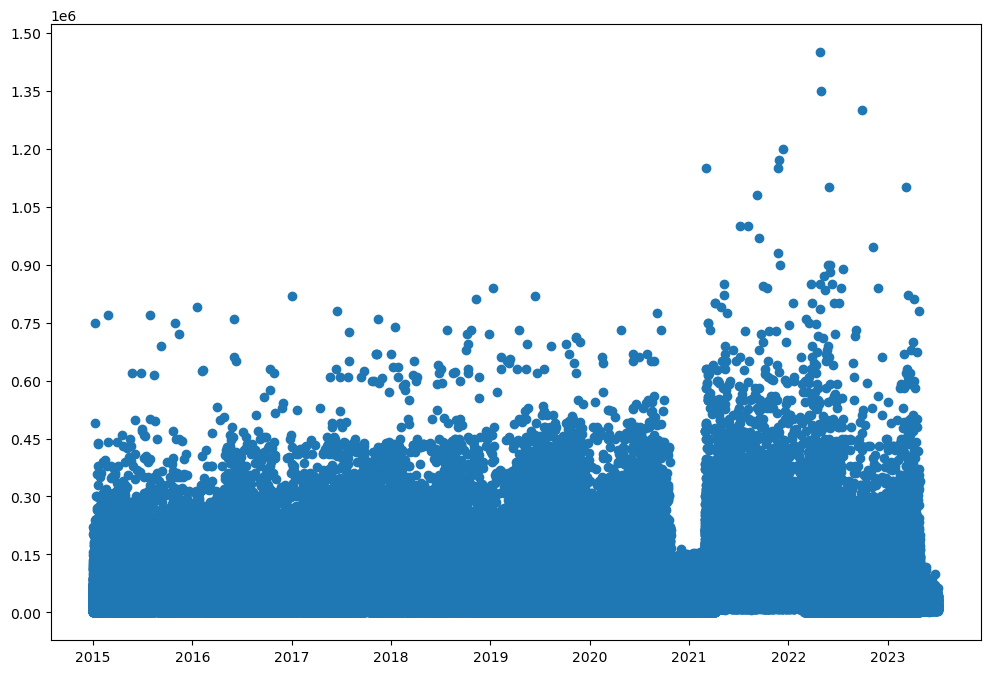

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(12, 8))

# date_format = mdates.DateFormatter('%Y-')
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
# ax.xaxis.set_major_formatter(date_format)
plt.scatter(pre_a_df['거래일'], pre_a_df['거래금액'])

# y축 눈금 간격 설정
ax = plt.gca()  # 현재 축 가져오기
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=12))  # y축 주요 눈금 최대 5개로 설정

# 그래프 나머지 부분 설정 및 표시
plt.show()


array([[<Axes: title={'center': '지역코드'}>,
        <Axes: title={'center': '거래일'}>],
       [<Axes: title={'center': '전용면적'}>,
        <Axes: title={'center': '건축년도'}>],
       [<Axes: title={'center': '거래금액'}>, <Axes: >]], dtype=object)

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from curren

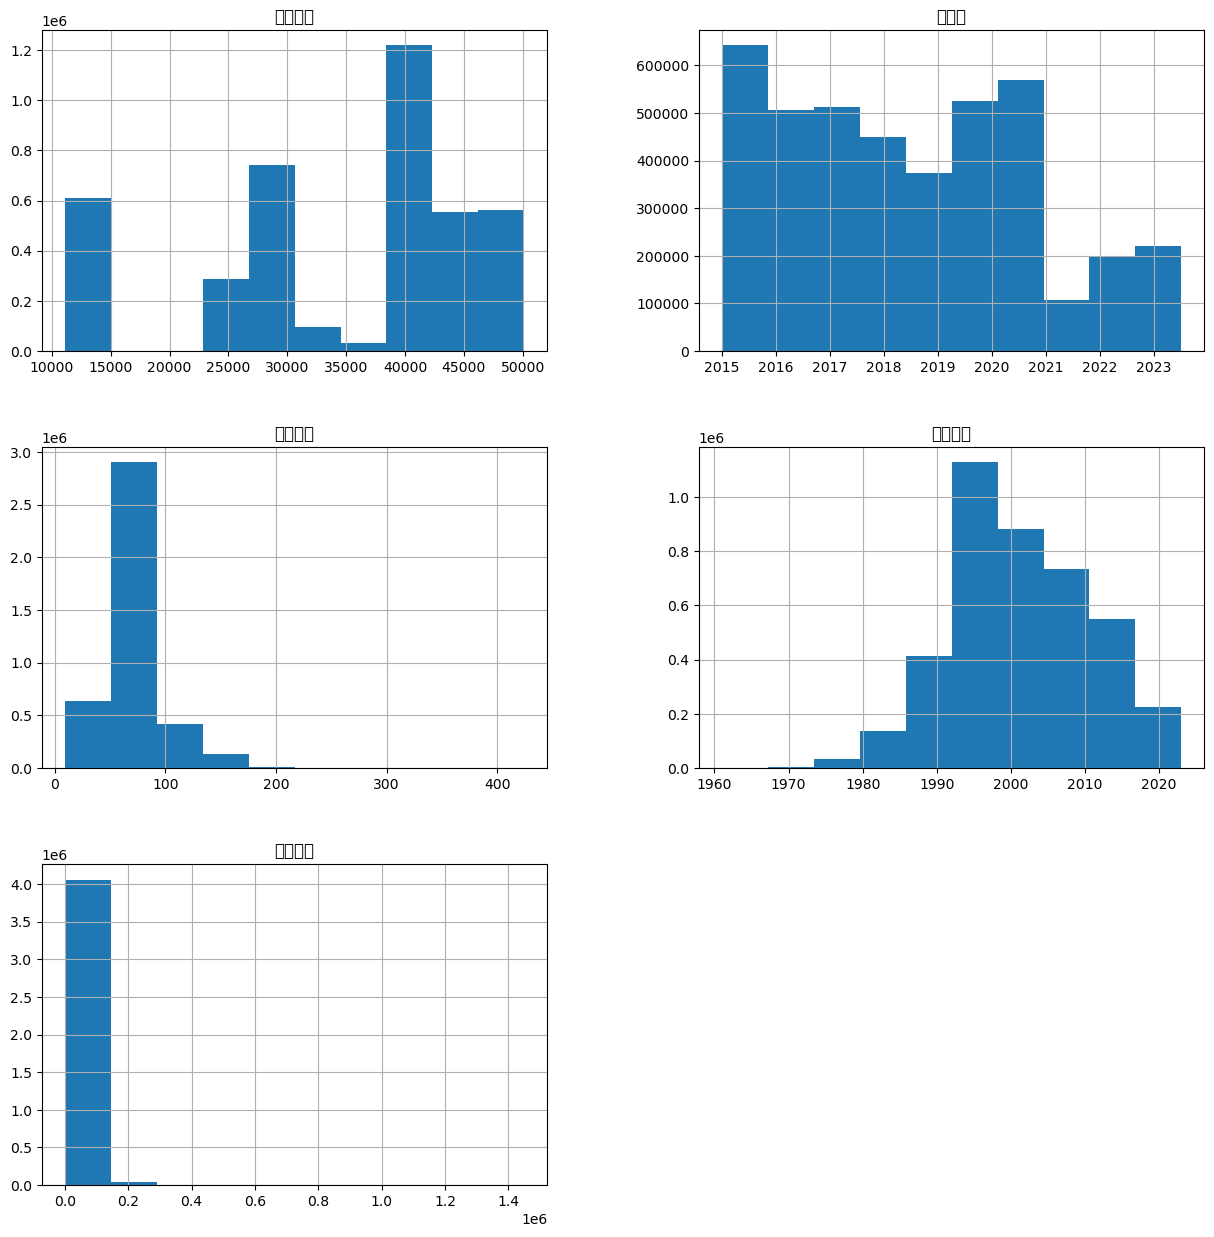

In [20]:
from matplotlib import rcParams

rcParams['font.family'] = 'AppleGothic'
pre_a_df.hist(figsize=(15,15))

<Axes: >

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

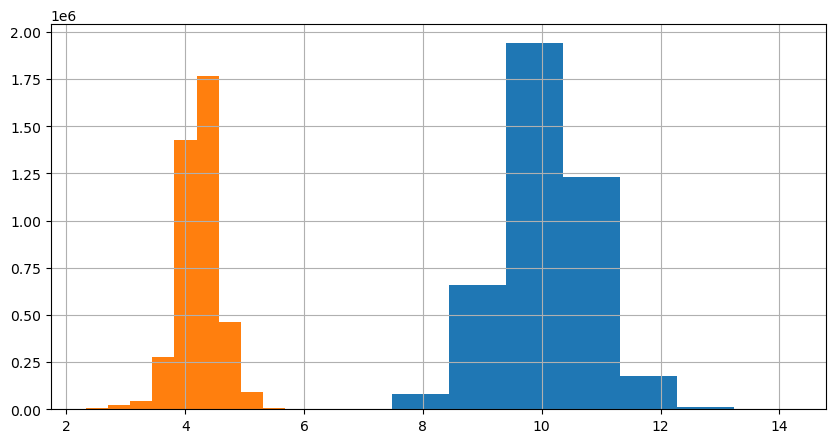

In [21]:
np.log1p(pre_a_df['거래금액']).hist(figsize=(10,5))
np.log1p(pre_a_df['전용면적']).hist(figsize=(10,5))

In [22]:
# target 데이터를 정규분포 형식으로 변경하기 위해 변경 (전용면적도 log를 취한 후 계산)
pre_a_df['거래금액'] = np.log1p(pre_a_df['거래금액'])
pre_a_df['전용면적'] = np.log1p(pre_a_df['전용면적'])

array([[<Axes: title={'center': '지역코드'}>,
        <Axes: title={'center': '거래일'}>],
       [<Axes: title={'center': '전용면적'}>,
        <Axes: title={'center': '건축년도'}>],
       [<Axes: title={'center': '거래금액'}>, <Axes: >]], dtype=object)

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from curren

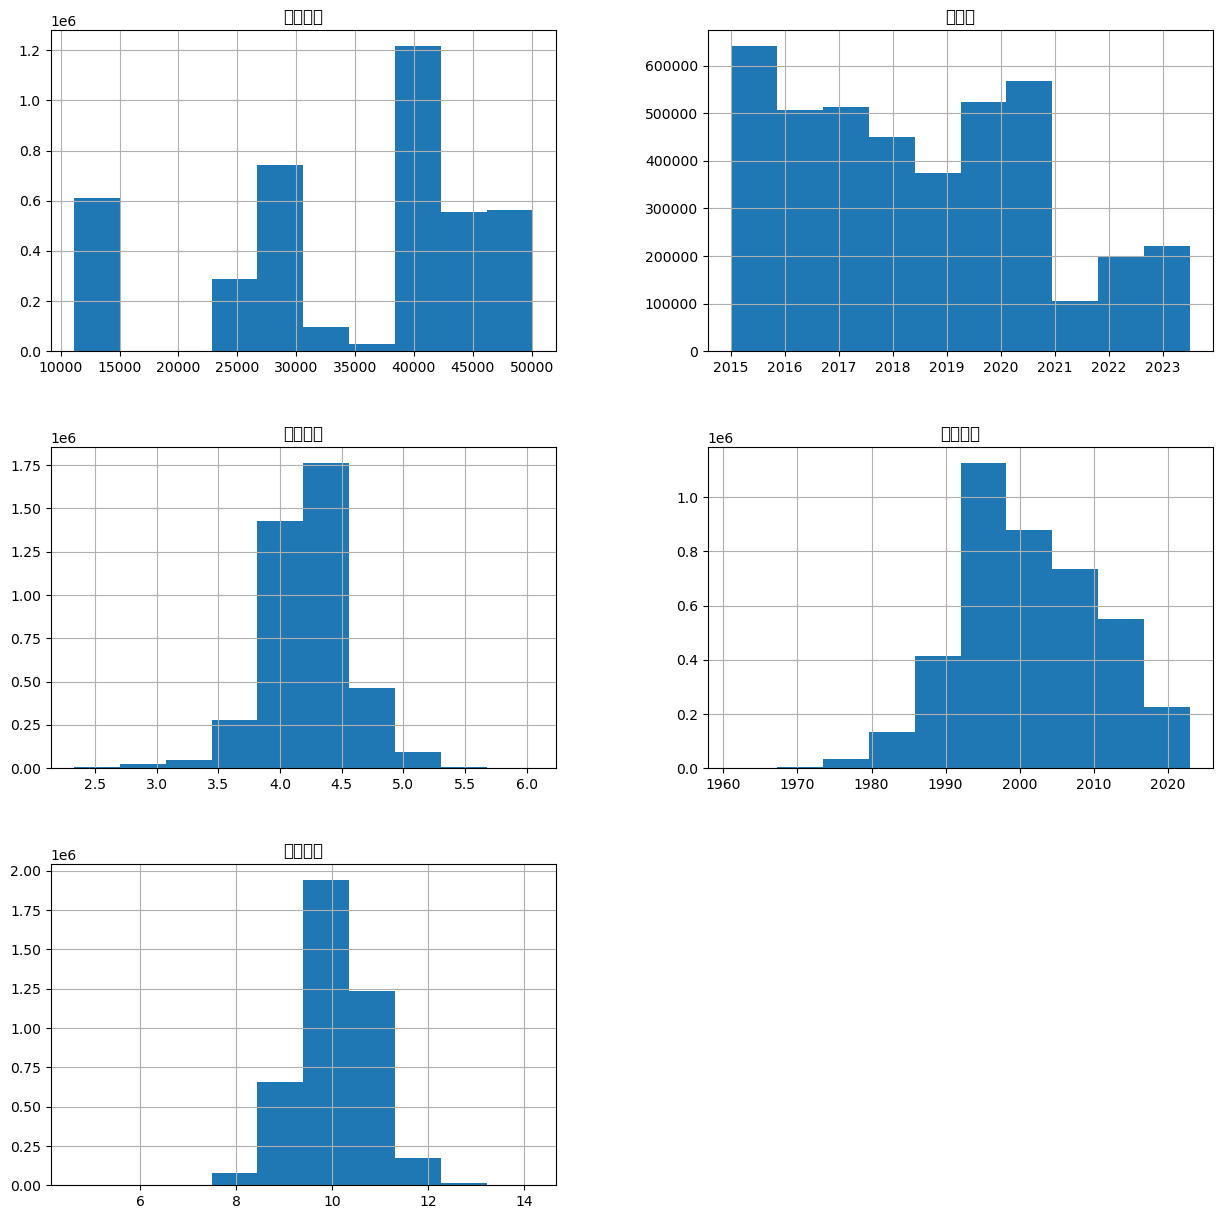

In [23]:
pre_a_df.hist(figsize=(15,15))

In [24]:
# OLS 수치값 확인 (범주형 데이터 없이 확인)
from statsmodels.api import OLS
# pre_a_df[['지역코드', '전용면적', '건축년도', '거래금액']]
features = pre_a_df[['지역코드', '전용면적', '건축년도']]
targets = pre_a_df['거래금액']

# features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          5.524e+08
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:02:14   Log-Likelihood:                     -2.9953e+06
No. Observations:             4103710   AIC:                                  5.991e+06
Df Residuals:                 4103707   BIC:                                  5.991e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
# feature 별 vif score 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [26]:
get_vif(features)

,vif_score,feature
0,9.421921,지역코드
1,154.267623,전용면적
2,166.304786,건축년도


In [27]:
# 원핫 인코더를 사용하여 범주형 데이터에 대하여 인코딩 진행 (원핫 인코더를 이용해서 확인이 불가하기 때문에 전처리 추가확인 필요)
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# columns = ['동', '아파트', '지번']
# one_hot_label_encoders = {}

# # 데이터프레임에 one-hot 인코딩된 결과를 담을 새로운 데이터프레임 생성
# one_hot_encoded_df = pd.DataFrame()

# for column in columns:
#     # OneHotEncoder 초기화
#     one_hot_encoder = OneHotEncoder()
    
#     # fit_transform 메서드는 2차원 데이터를 요구하므로 열을 numpy array로 변환한 후 reshape
#     result = one_hot_encoder.fit_transform(pre_a_df[[column]])  # 중요: [column]은 DataFrame 형태로 전달
    
#     # result는 희소 행렬이므로 toarray() 메서드를 사용해 밀집 배열 형태로 변환하거나 pandas DataFrame으로 변환
#     result_df = pd.DataFrame(result.toarray(), columns=one_hot_encoder.get_feature_names([column]))
    
#     # 새로운 데이터프레임에 결과 추가
#     one_hot_encoded_df = pd.concat([one_hot_encoded_df, result_df], axis=1)
    
#     # 인코더 저장
#     one_hot_label_encoders[column] = one_hot_encoder

# # 원본 pre_a_df와 one_hot_encoded_df를 결합 (원본 데이터에 추가하는 경우)
# pre_a_df = pd.concat([pre_a_df, one_hot_encoded_df], axis=1)

# # 불필요한 원본 범주형 열을 제거 (원본 범주형 데이터를 제거하려는 경우)
# pre_a_df.drop(columns, axis=1, inplace=True)

# print(one_hot_label_encoders)  # 저장된 인코더 출력


In [28]:
pre_a_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,2020-05-30,남운학성타운,379,4.916911,8,1991.0,10.192456
1,31110.0,남외동,2020-01-03,남외푸르지오1차,506-1,4.630838,2,2006.0,10.477316
2,31110.0,남외동,2020-01-03,에일린의뜰,500,4.454254,11,2007.0,10.505095
3,31110.0,남외동,2020-01-03,남외푸르지오1차,506-1,4.785039,8,2006.0,10.668979
4,31110.0,남외동,2020-01-04,남외푸르지오2차,501-1,4.453924,7,2007.0,10.563621
...,...,...,...,...,...,...,...,...,...
4103705,50130.0,대정읍 하모리,2023-06-29,더그라벨아파트,1221-1,4.062682,6,2019.0,9.878221
4103706,50130.0,동홍동,2023-07-04,주공5차(동홍5차),1674,3.929273,2,1999.0,9.985114
4103707,50130.0,서홍동,2023-07-04,서홍반석타운,2004-1,3.835358,1,2000.0,9.137877
4103708,50130.0,중문동,2023-07-01,중문푸른마을,1789,3.968025,2,2003.0,10.146473


In [29]:
# 아파트, 거래일, 지번, 제외
second_a_df = pre_a_df[['지역코드', '동', '전용면적','층', '건축년도', '거래금액']]
second_a_df

,지역코드,동,전용면적,층,건축년도,거래금액
0,31110.0,학성동,4.916911,8,1991.0,10.192456
1,31110.0,남외동,4.630838,2,2006.0,10.477316
2,31110.0,남외동,4.454254,11,2007.0,10.505095
3,31110.0,남외동,4.785039,8,2006.0,10.668979
4,31110.0,남외동,4.453924,7,2007.0,10.563621
...,...,...,...,...,...,...
4103705,50130.0,대정읍 하모리,4.062682,6,2019.0,9.878221
4103706,50130.0,동홍동,3.929273,2,1999.0,9.985114
4103707,50130.0,서홍동,3.835358,1,2000.0,9.137877
4103708,50130.0,중문동,3.968025,2,2003.0,10.146473


In [30]:
# '동' 에 대하여 label encoder 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
result = encoder.fit_transform(second_a_df['동'])
second_a_df['동'] = result 
second_a_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9040\682294827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_a_df['동'] = result


,지역코드,동,전용면적,층,건축년도,거래금액
0,31110.0,2977,4.916911,8,1991.0,10.192456
1,31110.0,447,4.630838,2,2006.0,10.477316
2,31110.0,447,4.454254,11,2007.0,10.505095
3,31110.0,447,4.785039,8,2006.0,10.668979
4,31110.0,447,4.453924,7,2007.0,10.563621
...,...,...,...,...,...,...
4103705,50130.0,657,4.062682,6,2019.0,9.878221
4103706,50130.0,814,3.929273,2,1999.0,9.985114
4103707,50130.0,1436,3.835358,1,2000.0,9.137877
4103708,50130.0,2566,3.968025,2,2003.0,10.146473


array([[<Axes: title={'center': '지역코드'}>, <Axes: title={'center': '동'}>],
       [<Axes: title={'center': '전용면적'}>,
        <Axes: title={'center': '건축년도'}>],
       [<Axes: title={'center': '거래금액'}>, <Axes: >]], dtype=object)

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from curren

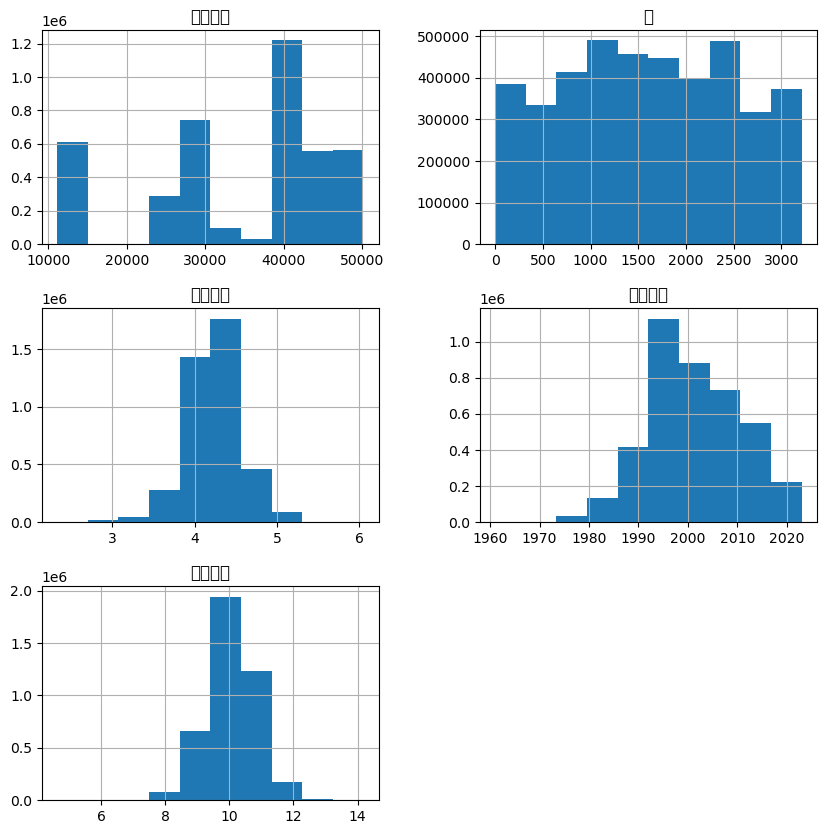

In [31]:
second_a_df.hist(figsize=(10, 10))

In [32]:
second_a_df

,지역코드,동,전용면적,층,건축년도,거래금액
0,31110.0,2977,4.916911,8,1991.0,10.192456
1,31110.0,447,4.630838,2,2006.0,10.477316
2,31110.0,447,4.454254,11,2007.0,10.505095
3,31110.0,447,4.785039,8,2006.0,10.668979
4,31110.0,447,4.453924,7,2007.0,10.563621
...,...,...,...,...,...,...
4103705,50130.0,657,4.062682,6,2019.0,9.878221
4103706,50130.0,814,3.929273,2,1999.0,9.985114
4103707,50130.0,1436,3.835358,1,2000.0,9.137877
4103708,50130.0,2566,3.968025,2,2003.0,10.146473


In [33]:
second_a_df['층'] = second_a_df['층'].astype(np.float64)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9040\3211727876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_a_df['층'] = second_a_df['층'].astype(np.float64)


In [34]:
# OLS 수치 확인
from statsmodels.api import OLS

features, targets = second_a_df.iloc[:, :-1] , second_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          3.449e+08
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:02:20   Log-Likelihood:                     -2.9137e+06
No. Observations:             4103710   AIC:                                  5.827e+06
Df Residuals:                 4103705   BIC:                                  5.827e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
get_vif(features)

,vif_score,feature
0,9.493873,지역코드
1,4.243463,동
2,157.704855,전용면적
3,3.178956,층
4,168.133686,건축년도


In [36]:
# 전용면적, 건축년도를 포함한 상관관계확인
# 선형회귀 분석모델 선언
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size = 0.2, random_state=321)

l_r = LinearRegression()

In [37]:
l_r.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [39]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.2253, RMSE: 0.4747, MSLE: 0.0019, RMSLE: 0.0433, R2: 0.6059


In [40]:
# 지역코드를 제외한 후 상관관계 확인
# OLS 수치 확인
from statsmodels.api import OLS

# features, targets = second_a_df.iloc[:, 1:-1] , second_a_df.iloc[:, -1]
features, targets = second_a_df[['지역코드', '동','층','건축년도']] , second_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.642e+08
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:02:27   Log-Likelihood:                     -3.9157e+06
No. Observations:             4103710   AIC:                                  7.831e+06
Df Residuals:                 4103706   BIC:                                  7.832e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
get_vif(features)

,vif_score,feature
0,9.473917,지역코드
1,4.242147,동
2,3.110900,층
3,14.268124,건축년도


In [42]:
# 건축년도를 포함한 상관관계확인
# 선형회귀 분석모델 선언
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size = 0.2, random_state=321)

l_r = LinearRegression()

In [43]:
l_r.fit(X_train, y_train)

LinearRegression()

In [44]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.3611, RMSE: 0.6009, MSLE: 0.0030, RMSLE: 0.0549, R2: 0.3684


In [45]:
# 오히려 더 커진 내용 확인

In [46]:
# 건축년도를 제외한 후 분석
# 지역코드를 제외한 후 상관관계 확인
# OLS 수치 확인
from statsmodels.api import OLS

# features, targets = second_a_df.iloc[:, 1:-1] , second_a_df.iloc[:, -1]
features, targets = second_a_df[['지역코드', '동','층','전용면적']] , second_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.285e+08
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:02:31   Log-Likelihood:                     -4.2124e+06
No. Observations:             4103710   AIC:                                  8.425e+06
Df Residuals:                 4103706   BIC:                                  8.425e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
get_vif(features)

,vif_score,feature
0,8.842166,지역코드
1,4.199057,동
2,3.177450,층
3,13.383115,전용면적


In [48]:
# 전용면적을 포함한 상관관계확인
# 선형회귀 분석모델 선언
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size = 0.2, random_state=321)

l_r = LinearRegression()

In [49]:
l_r.fit(X_train, y_train)

LinearRegression()

In [50]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.2497, RMSE: 0.4997, MSLE: 0.0021, RMSLE: 0.0457, R2: 0.5633


In [51]:
# 결론: Durbin-Watson의 값은 건축년도를 제외하는 값이 높았으나 R2 점수를 확인했을 때는 전용면적, 건축년도 모두 다 포함하는 값이 좋다.
# 해당 분석결과는 지역에 대한 아파트 값입니다. 

### 차수를 높여가면서 오차를 줄여준다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree =2).fit_trainsorm(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

In [ ]:
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)